## Source: Pima Indians Diabetes Database
## **TASK: Predict the probability of diabetes occurrence based on diagnostic measures.**
## First, Importing all necessary libraries

In [541]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# For Data Cleaning
from sklearn.impute import KNNImputer
from sklearn.neighbors import LocalOutlierFactor

# For Data Splitting
from sklearn.model_selection import train_test_split

# For Data Preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# For Model Building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# For Model Evaluation
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, mean_squared_error
from sklearn import metrics

# For Model Tuning
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

## Loading the dataset

In [542]:
diabetesDF = pd.read_csv('diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Plotting the data distributions

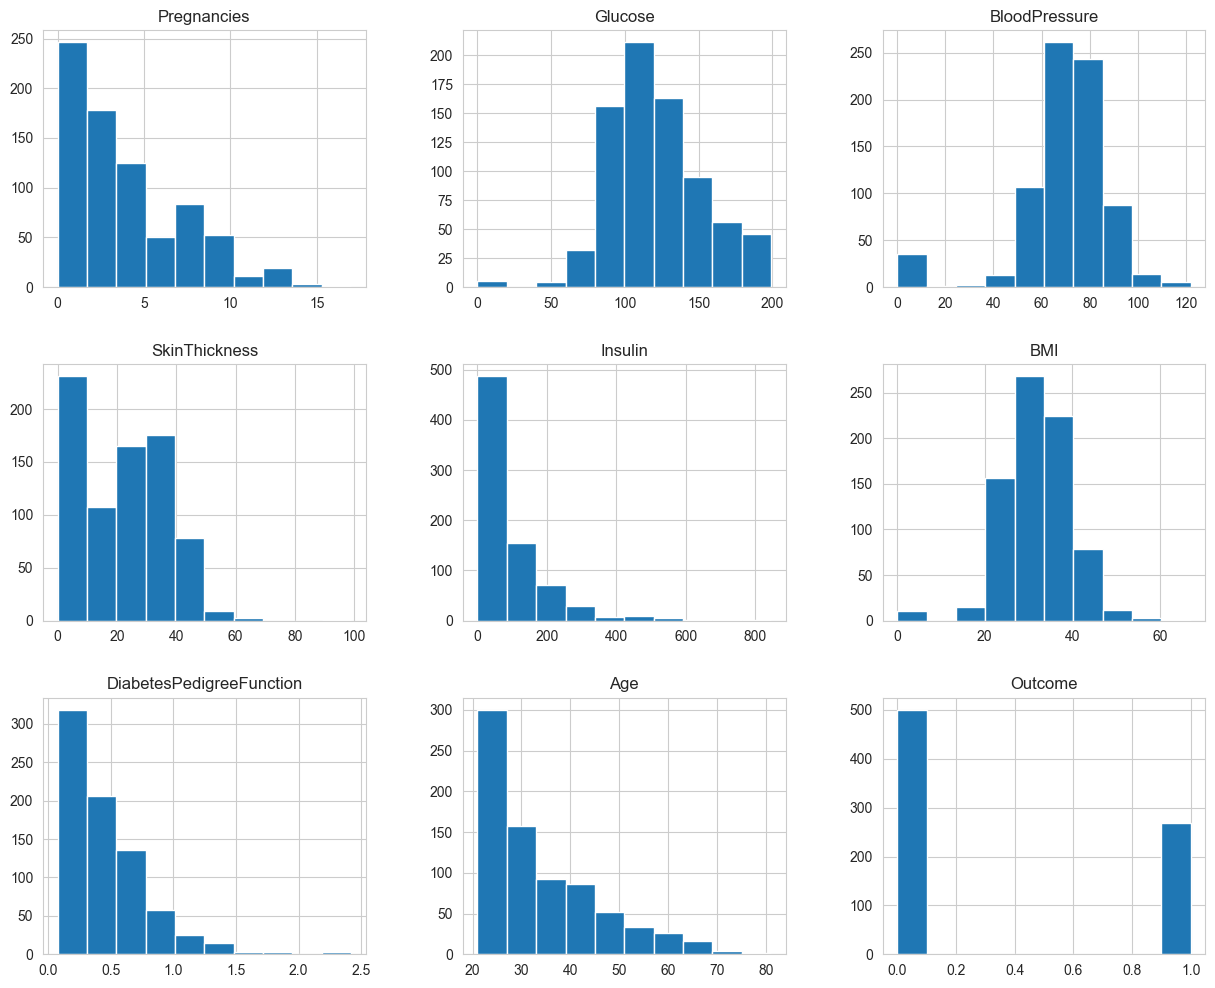

In [543]:
diabetesDF.hist(figsize=(15,12))
plt.show()

<h3><b>Description of the dataset</b></h3>

In [544]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [545]:
diabetesDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<h3>Interpretation</h3>
1. Pregnancies: Women in this dataset have an average of 3.85 pregnancies, with a range from 0 to 17.<br>
2. Glucose: The average glucose level is 120.89, with values ranging from 0 to 199. The presence of 0 values might indicate missing data.<br>
3. Blood Pressure: Average blood pressure is 69.11, with a range from 0 to 122. Similar to glucose, 0 values could indicate missing data.<br>
4. Skin Thickness: The average skin thickness is 20.54, with many 0 values indicating possible missing data.<br>
5. Insulin: Insulin levels vary widely (mean 79.80, std 115.24), with many 0 values, suggesting a lot of missing or unrecorded data.<br>
6. BMI: The average BMI is 31.99, which is in the overweight range, with values up to 67.1.<br>
7. Diabetes Pedigree Function: This variable measures genetic influence, with an average value of 0.47.<br>
8. Age: The average age is 33.24, ranging from 21 to 81, indicating a relatively young to middle-aged population.<br>
9. Outcome: About 34.9% of individuals have diabetes (mean outcome of 0.35).<br>

but........<br><br>
On the columns below, a value of zero does not make sense and thus indicates missing value;<br><br>
Glucose<br>
BloodPressure<br>
SkinThickness<br>
Insulin<br>
BMI<br>


## Replacing zeros with NaN (so that counting and manipulating them is easier)...

In [546]:
diabetesDF_copy = diabetesDF.copy(deep = True)
diabetesDF_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetesDF_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [547]:
#PRINTING THE NUMER OF MISSING VALUES IN EACH COLUMN
diabetesDF_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

## **Imputation**

Using the KNN Imputer instead of simple mean or median imputation methods because it leverages the relationships between features by considering the k-nearest neighbors, leading to more accurate and appropriate imputations.


In [548]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
diabetesDF_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = knn_imputer.fit_transform(diabetesDF_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']])

In [549]:
diabetesDF_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.688802,30.468444,44.000,99.75000,117.0000,141.00000,199.00
BloodPressure,768.0,72.375651,12.266881,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,28.774740,9.735051,7.000,22.00000,29.0000,35.00000,99.00
Insulin,768.0,148.895833,102.902279,14.000,80.37500,125.0000,183.62500,846.00
BMI,768.0,32.477083,6.918492,18.200,27.50000,32.3500,36.62500,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## **Exploratory Data Analysis**

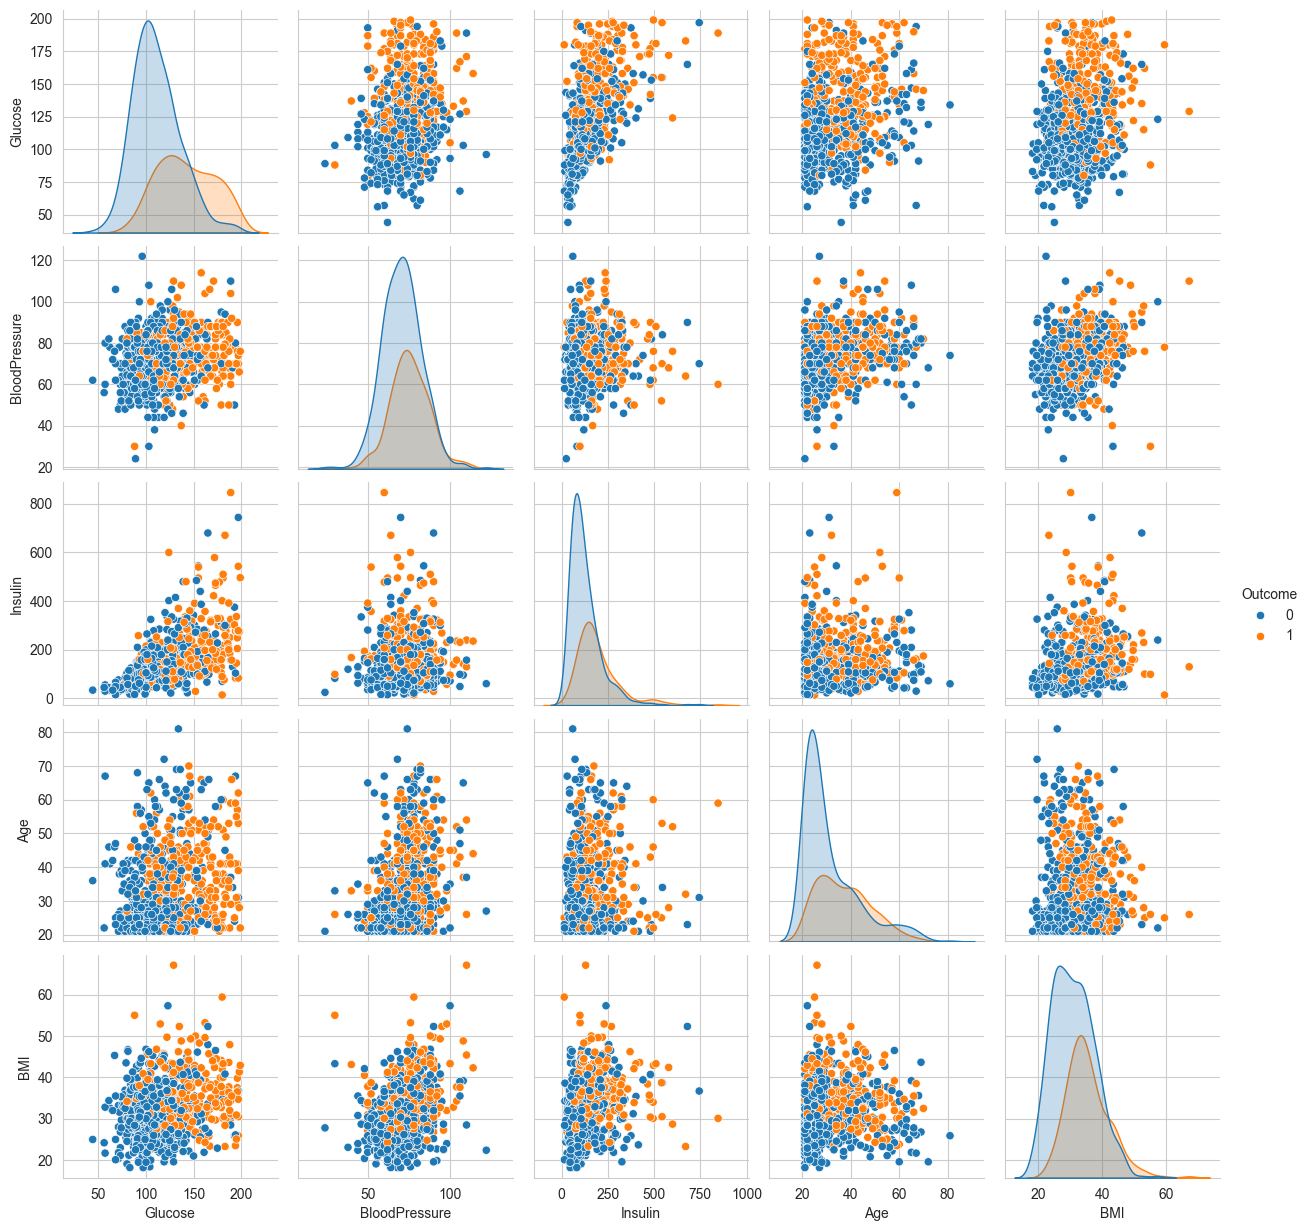

In [550]:
col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']

sns.pairplot(diabetesDF_copy[col] ,hue='Outcome')

<Axes: >

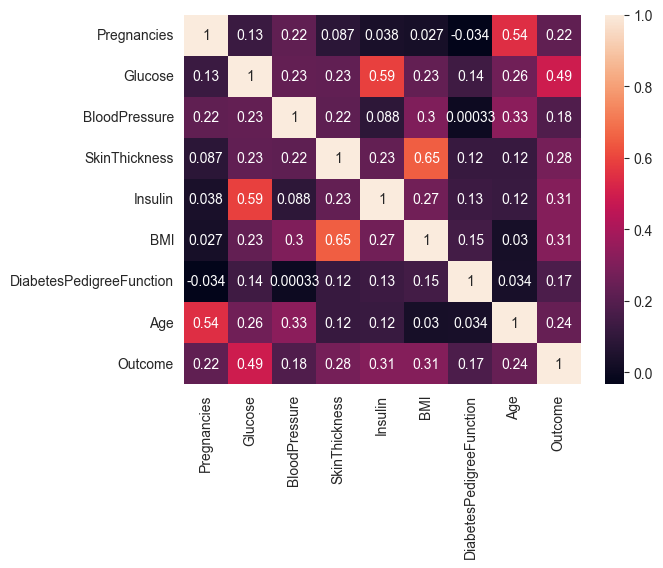

In [551]:
corr = diabetesDF_copy.corr()
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns,
         annot=True)

<Axes: xlabel='BMI', ylabel='Glucose'>

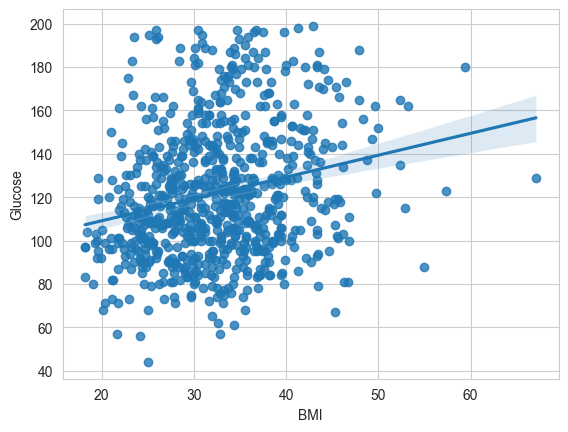

In [552]:
sns.regplot(x='BMI', y= 'Glucose', data=diabetesDF_copy)

<Axes: xlabel='Glucose', ylabel='Insulin'>

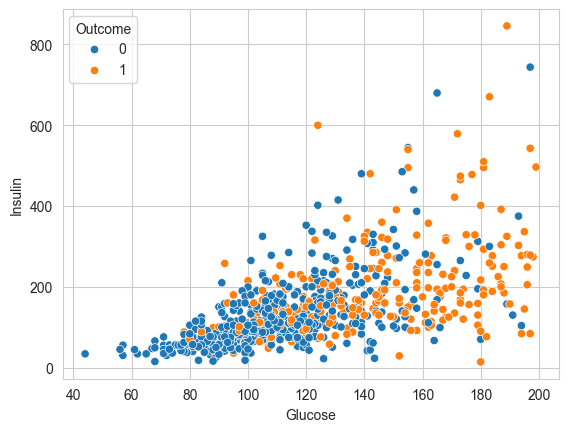

In [553]:
sns.scatterplot(x='Glucose', y= 'Insulin', data=diabetesDF_copy, hue='Outcome')

<Axes: xlabel='Insulin', ylabel='Density'>

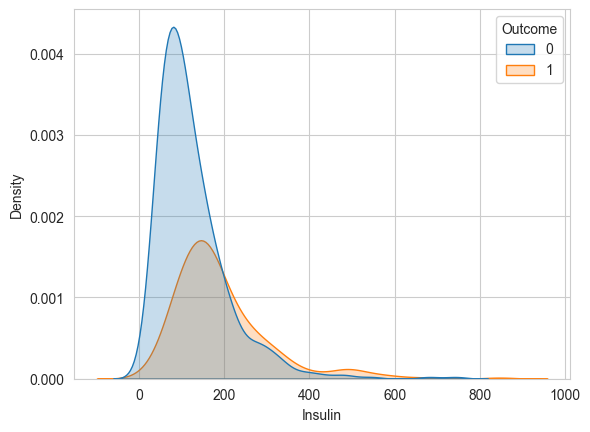

In [554]:
sns.kdeplot(data=diabetesDF_copy, x='Insulin',hue='Outcome' ,fill=True)

## **Checking for Outliers...**

In [555]:
for feature in diabetesDF_copy:
    
    Q1 = diabetesDF_copy[feature].quantile(0.25)
    Q3 = diabetesDF_copy[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if diabetesDF_copy[(diabetesDF_copy[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


## Plotting boxplots to visualize outliers...

<Axes: xlabel='SkinThickness'>

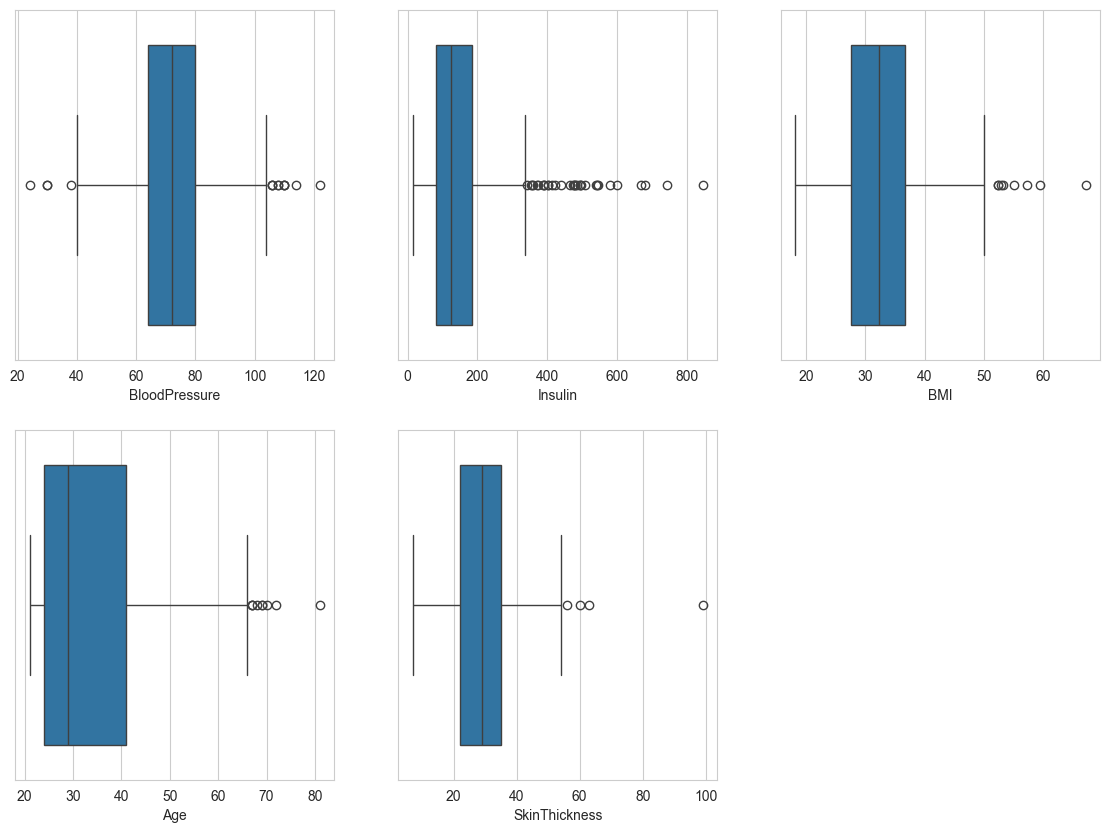

In [556]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')

plt.subplot(2,3,1)
sns.boxplot(x='BloodPressure',data=diabetesDF_copy)
plt.subplot(2,3,2)
sns.boxplot(x='Insulin',data=diabetesDF_copy)
plt.subplot(2,3,3)
sns.boxplot(x='BMI',data=diabetesDF_copy)
plt.subplot(2,3,4)
sns.boxplot(x='Age',data=diabetesDF_copy)
plt.subplot(2,3,5)
sns.boxplot(x='SkinThickness',data=diabetesDF_copy)

<Axes: xlabel='Outcome', ylabel='Insulin'>

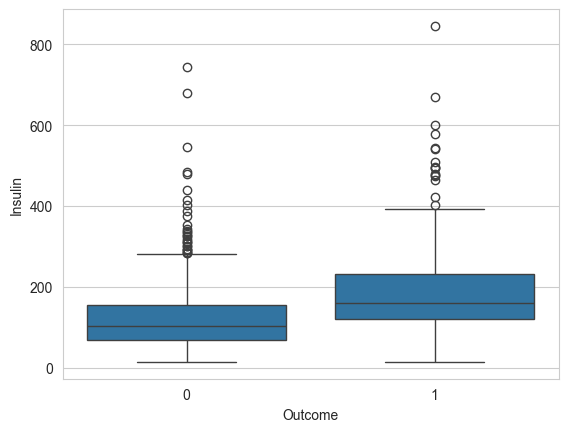

In [557]:
sns.boxplot(x='Outcome',y='Insulin',data=diabetesDF_copy)

## Detecting outliers using Local Outlier Factor (LOF)...

In [558]:
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(diabetesDF_copy)

array([ 1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [559]:
df_scores = lof.negative_outlier_factor_
print(np.sort(df_scores)[0:30])

[-3.03261954 -2.34840962 -2.21005307 -2.11964036 -2.05333478 -1.97499163
 -1.94647805 -1.90059388 -1.81488265 -1.72106389 -1.71897975 -1.71574332
 -1.70415457 -1.55551578 -1.54814801 -1.54562087 -1.53072816 -1.52421356
 -1.51296942 -1.50505277 -1.50060489 -1.45262283 -1.43187014 -1.42096764
 -1.42036311 -1.40580268 -1.39699284 -1.39643783 -1.3943845  -1.38818017]


## Setting a threshold for outliers...

In [560]:
threshold = np.sort(df_scores)[7]
threshold

-1.9005938775437314

## Removing all outliers based on set threshold...

In [561]:
outlier = df_scores > threshold
diabetesDF_cleaned = diabetesDF_copy[outlier]
diabetesDF_cleaned.shape

(760, 9)

## **Splitting the data into target and features...**

In [562]:
y = diabetesDF_cleaned['Outcome']
X = diabetesDF_cleaned.drop('Outcome', axis=1)

## **Splitting the data into training and testing data...**

In [563]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y )

## **Model Evaluation and Hyperparameter Tuning**

**Defining models and param grids**

In [564]:
# Define models and their parameter grids
models = {
    'Decision Tree': (DecisionTreeClassifier(random_state=90), {
        'classifier__max_depth': [None, 5, 10, 15]
    }),
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'classifier__n_estimators': [50, 80, 100],
        'classifier__max_depth': [None, 10, 20, 30]
    }),
    'K-Nearest Neighbors': (KNeighborsClassifier(), {
        'classifier__n_neighbors': [3, 5, 7, 9]
    }),
    'Logistic Regression': (LogisticRegression(random_state=90), {
        'classifier__C': [0.01, 0.1, 1, 10, 100]
    })
}

## **Defining function to create a pipeline to: perform grid search & evaluate the model's performance using cross-validation**


Evaluating Decision Tree...
Best parameters for DecisionTreeClassifier(random_state=90): {'classifier__max_depth': 5}
Best cross-validation score for DecisionTreeClassifier(random_state=90): 0.7269611163798944
Test Accuracy: 0.7631578947368421
F1 Score: 0.7535579174923437
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80        99
           1       0.62      0.81      0.70        53

    accuracy                           0.76       152
   macro avg       0.75      0.77      0.75       152
weighted avg       0.79      0.76      0.77       152



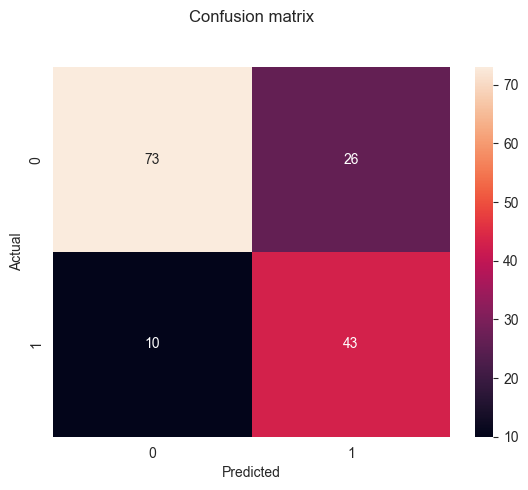

Evaluating Random Forest...
Best parameters for RandomForestClassifier(random_state=42): {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Best cross-validation score for RandomForestClassifier(random_state=42): 0.7500067741498442
Test Accuracy: 0.7697368421052632
F1 Score: 0.749705951540814
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.66      0.70      0.68        53

    accuracy                           0.77       152
   macro avg       0.75      0.75      0.75       152
weighted avg       0.77      0.77      0.77       152



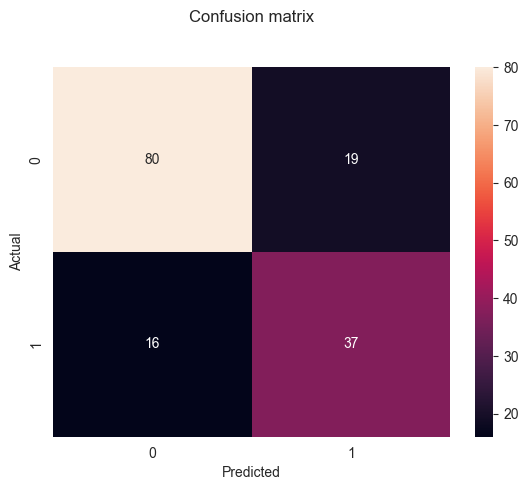

Evaluating K-Nearest Neighbors...
Best parameters for KNeighborsClassifier(): {'classifier__n_neighbors': 9}
Best cross-validation score for KNeighborsClassifier(): 0.7220701801923859
Test Accuracy: 0.7894736842105263
F1 Score: 0.782078853046595
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.75      0.82        99
           1       0.65      0.87      0.74        53

    accuracy                           0.79       152
   macro avg       0.78      0.81      0.78       152
weighted avg       0.82      0.79      0.79       152



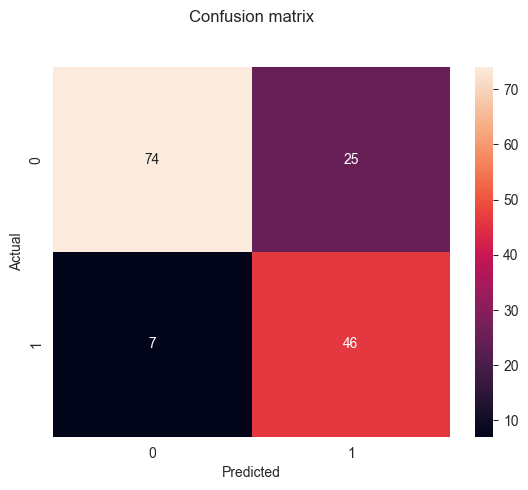

Evaluating Logistic Regression...
Best parameters for LogisticRegression(random_state=90): {'classifier__C': 1}
Best cross-validation score for LogisticRegression(random_state=90): 0.7532312694756808
Test Accuracy: 0.7960526315789473
F1 Score: 0.7816800259463467
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.81      0.84        99
           1       0.68      0.77      0.73        53

    accuracy                           0.80       152
   macro avg       0.78      0.79      0.78       152
weighted avg       0.80      0.80      0.80       152



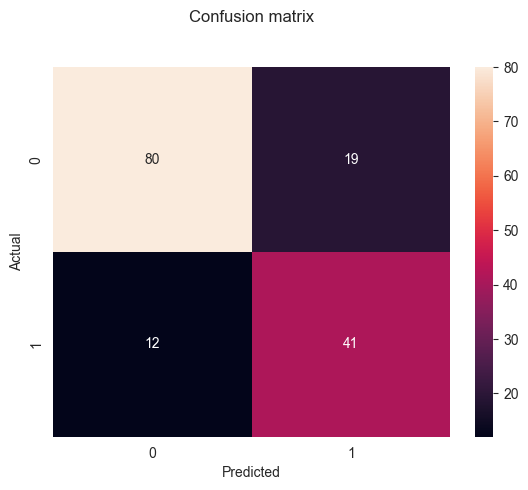

                 Model                                    Best Parameters  \
0        Decision Tree                       {'classifier__max_depth': 5}   
1        Random Forest  {'classifier__max_depth': 10, 'classifier__n_e...   
2  K-Nearest Neighbors                     {'classifier__n_neighbors': 9}   
3  Logistic Regression                               {'classifier__C': 1}   

   Test Accuracy  F1 Score  
0       0.763158  0.753558  
1       0.769737  0.749706  
2       0.789474  0.782079  
3       0.796053  0.781680  


In [565]:
# Function to create pipeline, perform grid search, and evaluate model
def train_and_evaluate_with_grid_search(model, param_grid, X_train, y_train, X_test, y_test):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=99)),
        ('classifier', model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    best_model = grid_search.best_estimator_
    
    # Evaluate on the test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    print(f"Best parameters for {model}: {best_params}")
    print(f"Best cross-validation score for {model}: {best_score}")
    print("Test Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    cnf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(cnf_matrix, annot=True, fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return accuracy, f1, best_params



# Store results for comparison
results = []

for model_name, (model, param_grid) in models.items():
    print(f"Evaluating {model_name}...")
    accuracy, f1, best_params = train_and_evaluate_with_grid_search(model, param_grid, X_train, y_train, X_test, y_test)
    results.append({
        'Model': model_name,
        'Best Parameters': best_params,
        'Test Accuracy': accuracy,
        'F1 Score': f1
    })

# Create a DataFrame to summarize results
results_df = pd.DataFrame(results)
print(results_df)

## **Feature Importance Analysis**

## Feature Importance Analysis for **RandomForestClassifier**

In [566]:
# Fit the selected model on the entire dataset
best_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
best_model.fit(X_train, y_train)

# Get feature importances
importances = best_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature importances
for i, feature_index in enumerate(indices):
    print(f"{i+1}. {X.columns[feature_index]}: {importances[feature_index]}")


1. Glucose: 0.2245496594284833
2. BMI: 0.1504924977434009
3. Insulin: 0.149048290477581
4. Age: 0.12176012800636814
5. DiabetesPedigreeFunction: 0.11029794610720399
6. SkinThickness: 0.09462941937139181
7. Pregnancies: 0.07590900821203891
8. BloodPressure: 0.07331305065353194


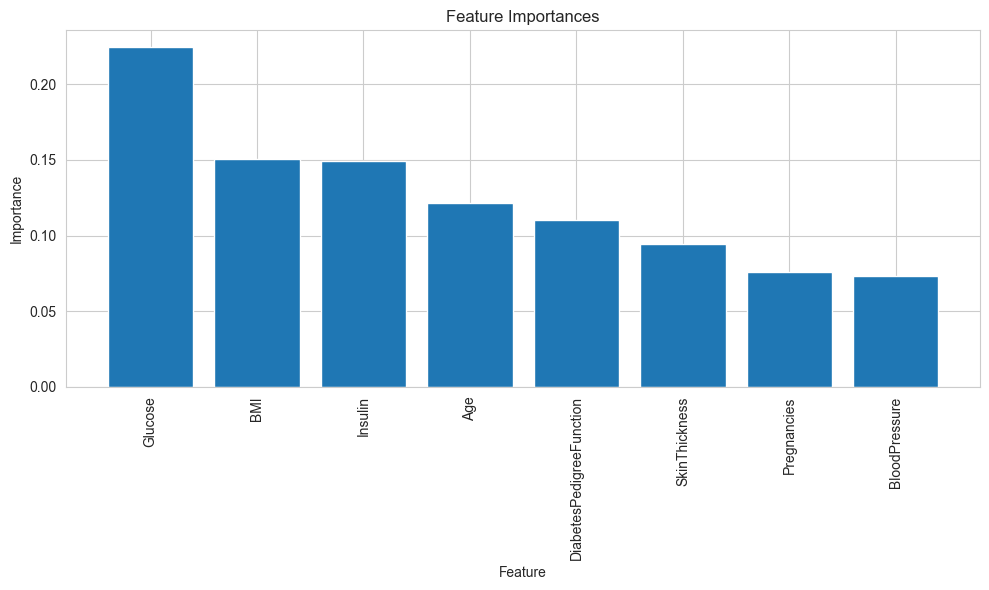

In [567]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

## Feature Importance Analysis for **DecisionTreeClassifier**

In [568]:
# Fit Decision Tree model on the entire dataset
decision_tree_model = DecisionTreeClassifier(max_depth=5, random_state=90)
decision_tree_model.fit(X_train, y_train)

# Get feature importances
importances_dt = decision_tree_model.feature_importances_

# Sort feature importances in descending order
indices_dt = np.argsort(importances_dt)[::-1]

# Print feature importances
for i, feature_index in enumerate(indices_dt):
    print(f"{i+1}. {X.columns[feature_index]}: {importances_dt[feature_index]}")


1. Glucose: 0.42444207728310557
2. BMI: 0.18223070582312867
3. Age: 0.1436677877750046
4. Insulin: 0.08649192703487929
5. DiabetesPedigreeFunction: 0.07503786967751487
6. SkinThickness: 0.056739656094921986
7. BloodPressure: 0.031389976311445
8. Pregnancies: 0.0


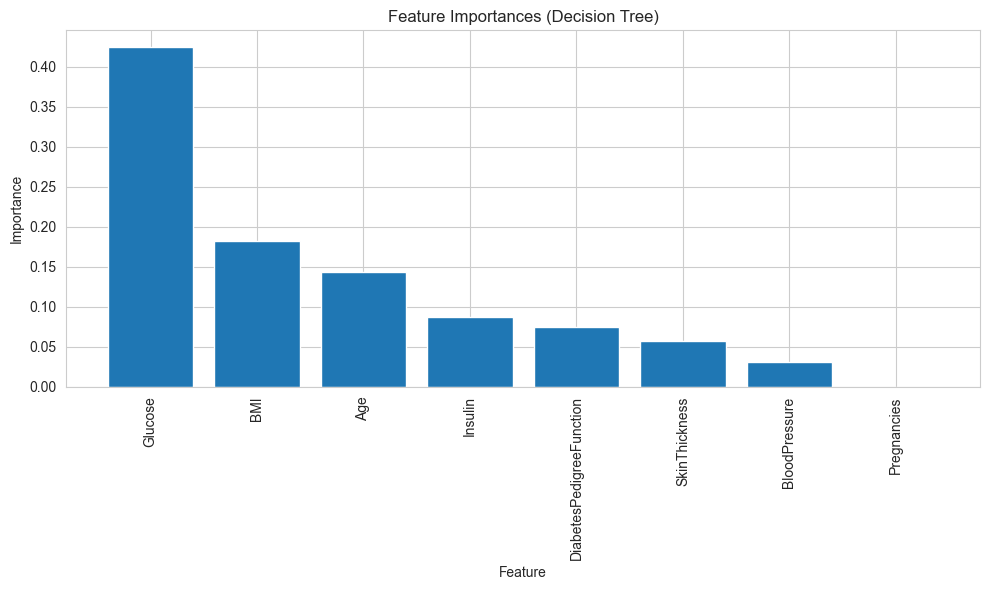

In [569]:
# Plot feature importances for Decision Tree
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Decision Tree)")
plt.bar(range(X.shape[1]), importances_dt[indices_dt], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices_dt], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

## Feature Importance Analysis for **LogisticRegression**

In [570]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=99)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)

# Fit Logistic Regression model on the balanced and scaled dataset
logistic_regression_model = LogisticRegression(random_state=90)
logistic_regression_model.fit(X_train_balanced_scaled, y_train_balanced)

# Get feature coefficients
coefficients = logistic_regression_model.coef_[0]

# Sort feature coefficients in descending order
indices_lr = np.argsort(np.abs(coefficients))[::-1]

# Print feature coefficients
for i, feature_index in enumerate(indices_lr):
    print(f"{i+1}. {X.columns[feature_index]}: {coefficients[feature_index]}")


1. Glucose: 1.0622124404780722
2. BMI: 0.5304034551976244
3. Pregnancies: 0.39284753997457095
4. DiabetesPedigreeFunction: 0.342477041031682
5. Age: 0.1684903494961284
6. SkinThickness: 0.13729298262694836
7. Insulin: 0.08290799076096024
8. BloodPressure: -0.014610503866755966


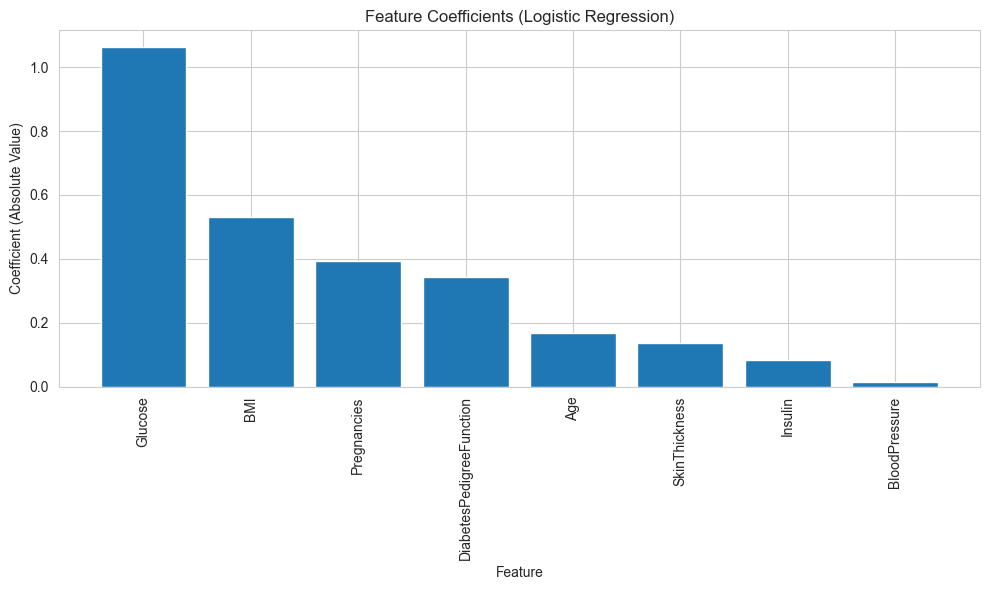

In [571]:
# Plot feature coefficients for Logistic Regression
plt.figure(figsize=(10, 6))
plt.title("Feature Coefficients (Logistic Regression)")
plt.bar(range(X.shape[1]), np.abs(coefficients[indices_lr]), align="center")
plt.xticks(range(X.shape[1]), X.columns[indices_lr], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Coefficient (Absolute Value)")
plt.tight_layout()
plt.show()